# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset 1

In [3]:
#Reading the dataset

df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv')
print(df.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [5]:
#Convert the date column into datetime data type
df["Date"] = pd.to_datetime(df["Date"],format="%d/%m/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


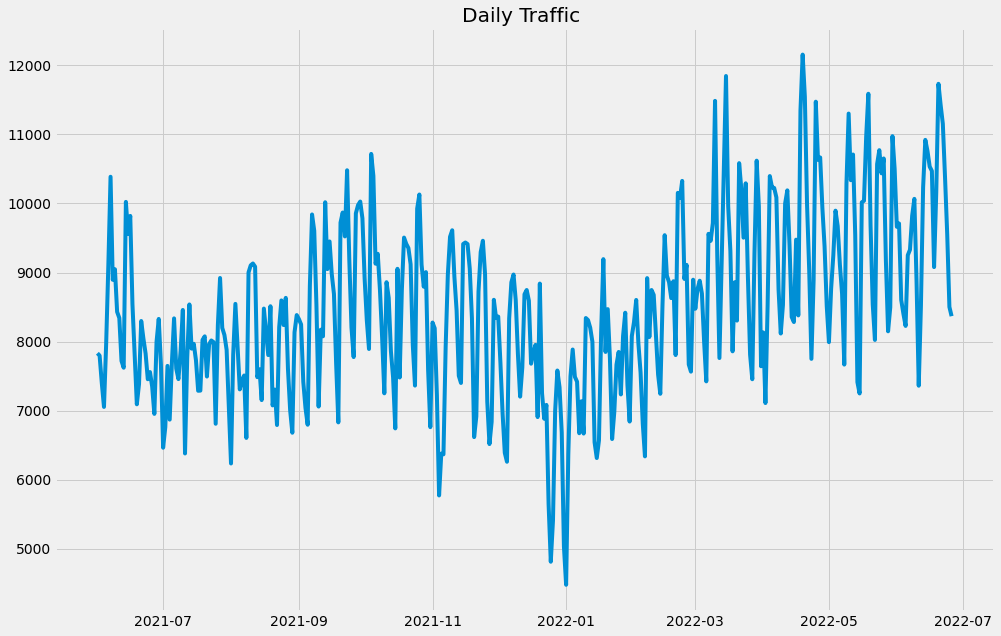

In [6]:
#Plotting the daily traffic 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df["Date"], df["Views"])
plt.title("Daily Traffic ")
plt.show()

# Dataset 2

In [ ]:
data = pd.read_csv('https://github.com/prathyuma-08/OnboardingAppUI/files/9331501/website-traffic.csv')
print(data.head())

   DayOfWeek MonthDay  Year  Visits
0     Monday   June 1  2009      27
1    Tuesday   June 2  2009      31
2  Wednesday   June 3  2009      38
3   Thursday   June 4  2009      38
4     Friday   June 5  2009      31
